<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>23010101039 | cardio_train Task-3 | 11-12-2025</b></center>    
<pre>    

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv("../data/cradio_preprocessed.csv")
df

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,0,18393,Male,168,62.0,110,80,1,1,0,0,1,0,50
1,1,1,20228,Female,156,85.0,140,90,3,1,0,0,1,1,55
2,2,2,18857,Female,165,64.0,130,70,3,1,0,0,0,1,51
3,3,3,17623,Male,169,82.0,150,100,1,1,0,0,1,1,48
4,4,4,17474,Female,156,56.0,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68677,69995,99993,19240,Male,168,76.0,120,80,1,1,1,0,1,0,52
68678,69996,99995,22601,Female,158,126.0,140,90,2,2,0,0,1,1,61
68679,69997,99996,19066,Male,183,105.0,180,90,3,1,0,1,0,1,52
68680,69998,99998,22431,Female,163,72.0,135,80,1,2,0,0,0,1,61


In [6]:
import sklearn

In [7]:
sklearn.__version__

'1.6.1'

# 1. Logistic Regression

# I. LOGISTIC REGRESSION : Train_Test_Split

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(['cardio', 'id', 'age','Unnamed: 0'], axis=1)
y = df[['cardio']]

In [9]:
X

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years
0,Male,168,62.0,110,80,1,1,0,0,1,50
1,Female,156,85.0,140,90,3,1,0,0,1,55
2,Female,165,64.0,130,70,3,1,0,0,0,51
3,Male,169,82.0,150,100,1,1,0,0,1,48
4,Female,156,56.0,100,60,1,1,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...
68677,Male,168,76.0,120,80,1,1,1,0,1,52
68678,Female,158,126.0,140,90,2,2,0,0,1,61
68679,Male,183,105.0,180,90,3,1,0,1,0,52
68680,Female,163,72.0,135,80,1,2,0,0,0,61


In [10]:
y

,cardio
0,0
1,1
2,1
3,1
4,0
...,...
68677,0
68678,1
68679,1
68680,1


In [11]:
#get_dummies
X1 = pd.get_dummies(X, columns=["gender"])
X1

,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,gender_Female,gender_Male
0,168,62.0,110,80,1,1,0,0,1,50,False,True
1,156,85.0,140,90,3,1,0,0,1,55,True,False
2,165,64.0,130,70,3,1,0,0,0,51,True,False
3,169,82.0,150,100,1,1,0,0,1,48,False,True
4,156,56.0,100,60,1,1,0,0,0,47,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
68677,168,76.0,120,80,1,1,1,0,1,52,False,True
68678,158,126.0,140,90,2,2,0,0,1,61,True,False
68679,183,105.0,180,90,3,1,0,1,0,52,False,True
68680,163,72.0,135,80,1,2,0,0,0,61,True,False


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
print(f"Training Shape : {X_train.shape}")
print(f"Testing Shape : {X_test.shape}")

Training Shape : (54945, 12)
Testing Shape : (13737, 12)


In [13]:
#StandardScaler()
#fit_transform()

from sklearn.preprocessing import StandardScaler

num_cols = ['height', 'weight', 'ap_hi', 'ap_lo', 'age_years']

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [14]:
X_train

,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,gender_Female,gender_Male
14018,0.448266,-0.286663,-1.589498,-2.231189,1,1,0,0,1,-1.896064,True,False
12535,0.321931,0.975807,-0.396198,-0.140047,1,1,0,0,1,-1.748217,True,False
4233,0.448266,0.134160,0.797101,-0.140047,1,2,0,0,1,0.025958,False,True
385,-2.583766,-1.058173,-0.396198,-0.140047,2,2,0,0,1,-0.565433,True,False
68573,1.079939,0.625121,0.797101,0.905524,1,1,0,0,1,0.913046,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
37194,-1.573089,0.695258,1.393751,1.951095,3,3,0,0,1,0.025958,True,False
6265,-0.057073,-0.567212,-0.396198,-0.140047,1,1,1,1,1,-0.861129,False,True
54886,0.069262,0.064023,0.498776,0.905524,1,1,0,0,1,0.469502,True,False
860,-1.067750,-0.988036,0.200451,-0.140047,3,3,0,0,1,1.060894,True,False


# Create Classification Model

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [15]:
y_predict = model.predict(X_test)

In [16]:
y_predict

array([1, 1, 1, ..., 0, 0, 1])

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_predict))

Accuracy: 0.7282521656839194


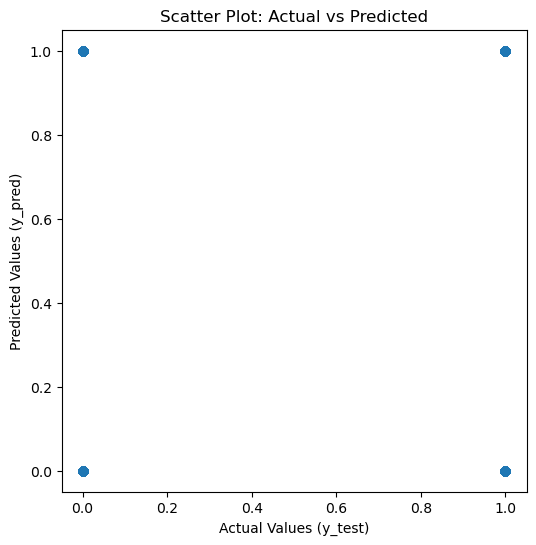

In [18]:
plt.figure(figsize=(6,6))

plt.scatter(y_test, y_predict, alpha=0.5)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Scatter Plot: Actual vs Predicted")
plt.show()

# Model Evaluation

In [19]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.7268723268723268
Test Accuracy: 0.7282521656839194


# Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[5433 1457]
 [2276 4571]]


In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6890
           1       0.76      0.67      0.71      6847

    accuracy                           0.73     13737
   macro avg       0.73      0.73      0.73     13737
weighted avg       0.73      0.73      0.73     13737



# II. LOGISTIC REGRESSION : Hyperparameter Tuning

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [10]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [500, 1000]
}


log_reg = LogisticRegression()

grid = GridSearchCV(
    log_reg,
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, y_train)


NameError: name 'X_train' is not defined

In [25]:
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Parameters: {'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV Accuracy: 0.7274365274365275


In [27]:
best_model = grid.best_estimator_

y_test_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Final Test Accuracy:",
      accuracy_score(y_test, y_test_pred))

Final Test Accuracy: 0.7282521656839194


# Confusion Matrix Graph

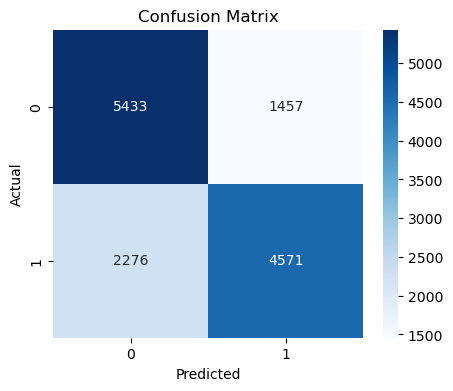

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

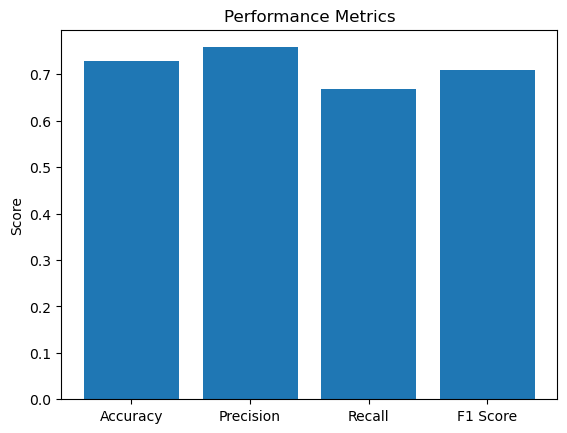

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

metrics = {
    "Accuracy": accuracy_score(y_test, y_test_pred),
    "Precision": precision_score(y_test, y_test_pred),
    "Recall": recall_score(y_test, y_test_pred),
    "F1 Score": f1_score(y_test, y_test_pred)
}

plt.bar(metrics.keys(), metrics.values())
plt.ylabel("Score")
plt.title("Performance Metrics")
plt.show()

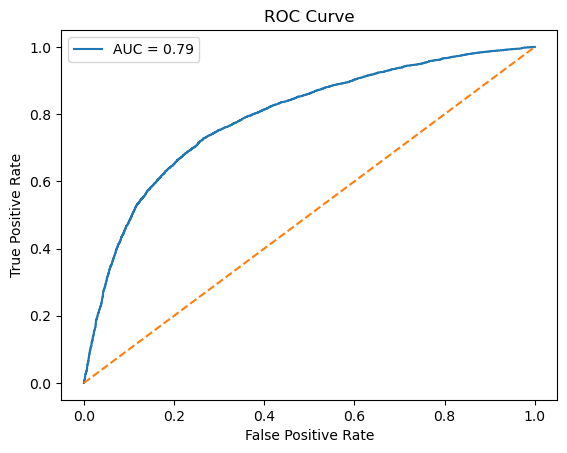

In [31]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="AUC = %.2f" % roc_auc)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [32]:
import pickle
import os

feature_columns = X.columns.tolist()

with open("../models/feature_columns.pkl", "wb") as f:
    pickle.dump(feature_columns, f)

# If scaler was used
with open("../models/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("../models/model.pkl", "wb") as f:
    pickle.dump(model, f)

In [36]:
feature_columns

['gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'age_years']

In [34]:
import pickle

mappings = {
    'gender': {
        'Female': {"gender_Male":0, "gender_Female":1},
        'Male': {"gender_Male":1, "gender_Female":0}
    },
    'cholesterol': {
        'Normal': 1,
        'Above Normal': 2,
        'Well Above Normal': 3
    },
    'gluc': {
        'Normal': 1,
        'Above Normal': 2,
        'Well Above Normal': 3
    },
    'smoke': {
        'No': 0,
        'Yes': 1
    },
    'alco': {
        'No': 0,
        'Yes': 1
    },
    'active': {
        'No': 0,
        'Yes': 1
    }
}

with open("../models/mappings.pkl", "wb") as f:
    pickle.dump(mappings, f)

In [35]:
os.listdir("../models")

['.ipynb_checkpoints',
 'feature_columns.pkl',
 'mappings.pkl',
 'model.pkl',
 'scaler.pkl']

# III. LOGISTIC REGRESSION : K-FOLD

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

# Model
lr = LogisticRegression(max_iter=1000)

# K-Fold configuration
kfold = KFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

# Cross-validation accuracy
lr_kfold_scores = cross_val_score(
    lr,
    X1,          # full feature set
    y.values.ravel(),
    cv=kfold,
    scoring='accuracy'
)

print("Logistic Regression K-Fold Accuracies:")
print(lr_kfold_scores)

print("Mean K-Fold Accuracy:",
      lr_kfold_scores.mean())

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression K-Fold Accuracies:
[0.72839776 0.72934411 0.72124345 0.72801398 0.72961561]
Mean K-Fold Accuracy: 0.7273229798796587


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 2. Naive Bayes

# I. NAIVE BAYES : Train_Test_Split

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model
nb_model = GaussianNB()

# Train
nb_model.fit(X_train, y_train.values.ravel())

# Predict
y_pred_nb = nb_model.predict(X_test)

# Accuracy
print("Naive Bayes Test Accuracy:",
      accuracy_score(y_test, y_pred_nb))

Naive Bayes Test Accuracy: 0.7107083060347965


In [21]:
# Train accuracy
y_train_pred_nb = nb_model.predict(X_train)

print("Train Accuracy:",
      accuracy_score(y_train, y_train_pred_nb))
print("Test Accuracy:",
      accuracy_score(y_test, y_pred_nb))

Train Accuracy: 0.7106561106561107
Test Accuracy: 0.7107083060347965


# II. NAIVE BAYES : K-fold

In [22]:
from sklearn.model_selection import cross_val_score

nb_kfold_scores = cross_val_score(
    GaussianNB(),
    X1,
    y.values.ravel(),
    cv=5,
    scoring='accuracy'
)

print("Naive Bayes K-Fold Accuracies:")
print(nb_kfold_scores)

print("Mean K-Fold Accuracy:",
      nb_kfold_scores.mean())

Naive Bayes K-Fold Accuracies:
[0.71245541 0.712601   0.70923122 0.71294409 0.70784799]
Mean K-Fold Accuracy: 0.7110159426846684


# III. NAIVE BAYES : Hyperparameter Tuning

In [23]:
from sklearn.model_selection import GridSearchCV

nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

nb_grid = GridSearchCV(
    GaussianNB(),
    nb_params,
    cv=5,
    scoring='accuracy'
)

nb_grid.fit(X_train, y_train.values.ravel())

print("Best Naive Bayes Parameters:",
      nb_grid.best_params_)

print("Best CV Accuracy:",
      nb_grid.best_score_)

Best Naive Bayes Parameters: {'var_smoothing': 1e-09}
Best CV Accuracy: 0.7101647101647102


In [24]:
best_nb = nb_grid.best_estimator_

y_test_pred_best_nb = best_nb.predict(X_test)

print("Final Tuned Test Accuracy:",
      accuracy_score(y_test, y_test_pred_best_nb))

Final Tuned Test Accuracy: 0.7107083060347965


# 3. Random Forest

# I. RANDOM FOREST : Train_Test_Split

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train.values.ravel())

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Test Accuracy:",
      accuracy_score(y_test, y_pred_rf))

Random Forest Test Accuracy: 0.7029919196331077


In [51]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

print("\nClassification Report:\n",
      classification_report(y_test, y_pred_rf))

Confusion Matrix:
 [[4897 1993]
 [2087 4760]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.71      6890
           1       0.70      0.70      0.70      6847

    accuracy                           0.70     13737
   macro avg       0.70      0.70      0.70     13737
weighted avg       0.70      0.70      0.70     13737



# II. RANDOM FOREST : K-fold

In [53]:
from sklearn.model_selection import cross_val_score

rf_kfold_scores = cross_val_score(
    RandomForestClassifier(n_estimators=100, random_state=42),
    X1,
    y.values.ravel(),
    cv=5,
    scoring='accuracy'
)

print("Random Forest K-Fold Accuracies:")
print(rf_kfold_scores)

print("Mean K-Fold Accuracy:",
      rf_kfold_scores.mean())

Random Forest K-Fold Accuracies:
[0.70663172 0.71230982 0.70741118 0.70624636 0.70267909]
Mean K-Fold Accuracy: 0.7070556356793138


# III. RANDOM FOREST : Hyperparameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train.values.ravel())

print("Best RF Parameters:",
      rf_grid.best_params_)

print("Best RF CV Accuracy:",
      rf_grid.best_score_)

Best RF Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best RF CV Accuracy: 0.7330239330239331


In [57]:
best_rf = rf_grid.best_estimator_

y_test_pred_best_rf = best_rf.predict(X_test)

print("Final Tuned RF Test Accuracy:",
      accuracy_score(y_test, y_test_pred_best_rf))

Final Tuned RF Test Accuracy: 0.7350949989080585


# 4. SVM

# I. SVM : Train_Test_Split

In [64]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf')

svm_model.fit(X_train, y_train.values.ravel())

y_pred_svm = svm_model.predict(X_test)

print("SVM Test Accuracy:",
      accuracy_score(y_test, y_pred_svm))

SVM Test Accuracy: 0.7337118730436049


In [65]:
y_train_pred_svm = svm_model.predict(X_train)

print("Train Accuracy:",
      accuracy_score(y_train, y_train_pred_svm))
print("Test Accuracy:",
      accuracy_score(y_test, y_pred_svm))

Train Accuracy: 0.737027937027937
Test Accuracy: 0.7337118730436049


In [66]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", cm_svm)

print("\nClassification Report:\n",
      classification_report(y_test, y_pred_svm))

Confusion Matrix:
 [[5463 1427]
 [2231 4616]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      6890
           1       0.76      0.67      0.72      6847

    accuracy                           0.73     13737
   macro avg       0.74      0.73      0.73     13737
weighted avg       0.74      0.73      0.73     13737



# II. SVM : K-fold

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

svm_kfold_scores = cross_val_score(
    SVC(kernel='rbf'),
    X1,
    y.values.ravel(),
    cv=5,
    scoring='accuracy'
)

print("SVM K-Fold Accuracies:")
print(svm_kfold_scores)

print("Mean K-Fold Accuracy:",
      svm_kfold_scores.mean())

SVM K-Fold Accuracies:
[0.72257407 0.72599549 0.72502912 0.71971462 0.72138905]
Mean K-Fold Accuracy: 0.7229404692842651


# III. SVM : Hyperparameter Tuning

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

svm_params = {
    'C': [1, 10],
    'gamma': ['scale'],
    'kernel': ['rbf']
}

svm_grid = GridSearchCV(
    SVC(),
    svm_params,
    cv=3,              # faster
    scoring='accuracy',
    n_jobs=-1          # use all CPU cores
)

svm_grid.fit(X_train, y_train.values.ravel())

best_svm = svm_grid.best_estimator_

print("Best Params:", svm_grid.best_params_)
print("Best CV Accuracy:", svm_grid.best_score_)

y_test_pred = best_svm.predict(X_test)

print("Final Test Accuracy:",
      accuracy_score(y_test, y_test_pred))

# 4. Decision Tree

# I. DECISION TREE : Train_Test_Split

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dt_model = DecisionTreeClassifier(
    random_state=42
)

# Train
dt_model.fit(X_train, y_train.values.ravel())

# Predict
y_pred_dt = dt_model.predict(X_test)

# Accuracy
print("Decision Tree Test Accuracy:",
      accuracy_score(y_test, y_pred_dt))

Decision Tree Test Accuracy: 0.6290310839339012


In [15]:
y_train_pred_dt = dt_model.predict(X_train)

print("Train Accuracy:",
      accuracy_score(y_train, y_train_pred_dt))
print("Test Accuracy:",
      accuracy_score(y_test, y_pred_dt))

Train Accuracy: 0.9802893802893803
Test Accuracy: 0.6290310839339012


In [16]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", cm_dt)

print("\nClassification Report:\n",
      classification_report(y_test, y_pred_dt))

Confusion Matrix:
 [[4433 2457]
 [2639 4208]]

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.64      0.64      6890
           1       0.63      0.61      0.62      6847

    accuracy                           0.63     13737
   macro avg       0.63      0.63      0.63     13737
weighted avg       0.63      0.63      0.63     13737



# II. DECISION TREE : K-fold

In [17]:
from sklearn.model_selection import cross_val_score

dt_kfold_scores = cross_val_score(
    DecisionTreeClassifier(random_state=42),
    X1,
    y.values.ravel(),
    cv=5,
    scoring='accuracy'
)

print("Decision Tree K-Fold Accuracies:")
print(dt_kfold_scores)

print("Mean K-Fold Accuracy:",
      dt_kfold_scores.mean())

Decision Tree K-Fold Accuracies:
[0.63012303 0.63936813 0.63628422 0.63147932 0.62965929]
Mean K-Fold Accuracy: 0.6333827971584847


# III. DECISION TREE : Hyperparameter Tuning

In [18]:
from sklearn.model_selection import GridSearchCV

dt_params = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_params,
    cv=5,
    scoring='accuracy'
)

dt_grid.fit(X_train, y_train.values.ravel())

print("Best Decision Tree Parameters:",
      dt_grid.best_params_)

print("Best Decision Tree CV Accuracy:",
      dt_grid.best_score_)

Best Decision Tree Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree CV Accuracy: 0.7300573300573301
